In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 28

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 28)                308       
                                                                 
Total params: 1,378
Trainable params: 1,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs = 1000,
    batch_size = 128,
    validation_data = (X_test, y_test),
    callbacks = [cp_callback, es_callback]
)

Epoch 1/1000
198/215 [==========================>...] - ETA: 0s - loss: 3.1832 - accuracy: 0.0847
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
215/215 [==============================] - 1s 4ms/step - loss: 3.1607 - accuracy: 0.0893 - val_loss: 2.7663 - val_accuracy: 0.1564
Epoch 2/1000
215/215 [==============================] - ETA: 0s - loss: 2.5947 - accuracy: 0.1981
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
215/215 [==============================] - 1s 3ms/step - loss: 2.5947 - accuracy: 0.1981 - val_loss: 2.0886 - val_accuracy: 0.4064
Epoch 3/1000
208/215 [============================>.] - ETA: 0s - loss: 2.2014 - accuracy: 0.2915
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
215/215 [==============================] - 1s 5ms/step - loss: 2.1961 - accuracy: 0.2935 - val_loss: 1.6589 - val_accuracy: 0.5759
Epoch 4/1000
213/215 [============================>.] - ETA: 0s - loss: 1.9665 - accu

Epoch 28/1000
215/215 [==============================] - ETA: 0s - loss: 1.3171 - accuracy: 0.5581
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
215/215 [==============================] - 2s 8ms/step - loss: 1.3171 - accuracy: 0.5581 - val_loss: 0.7300 - val_accuracy: 0.8544
Epoch 29/1000
210/215 [============================>.] - ETA: 0s - loss: 1.3075 - accuracy: 0.5622
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
215/215 [==============================] - 2s 8ms/step - loss: 1.3060 - accuracy: 0.5626 - val_loss: 0.7187 - val_accuracy: 0.8593
Epoch 30/1000
208/215 [============================>.] - ETA: 0s - loss: 1.3065 - accuracy: 0.5629
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
215/215 [==============================] - 2s 8ms/step - loss: 1.3057 - accuracy: 0.5634 - val_loss: 0.7184 - val_accuracy: 0.8466
Epoch 31/1000
214/215 [============================>.] - ETA: 0s - loss: 1.2924

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

68/68 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.8483


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.4624138e-06 2.5575629e-01 1.3625746e-03 3.4193648e-04 5.2143070e-03
 7.6997191e-02 1.4419201e-05 1.7421678e-05 4.0837263e-06 1.8020342e-05
 2.1795934e-06 1.7321150e-09 3.7421918e-04 9.3951367e-06 3.8384722e-04
 2.4050732e-06 1.7677351e-04 7.9388404e-03 2.5900695e-04 8.0663948e-11
 2.5024600e-04 4.4917265e-06 6.5085697e-01 1.1915115e-05 5.3343130e-09
 2.1995243e-08]
22


# Confusion matrix

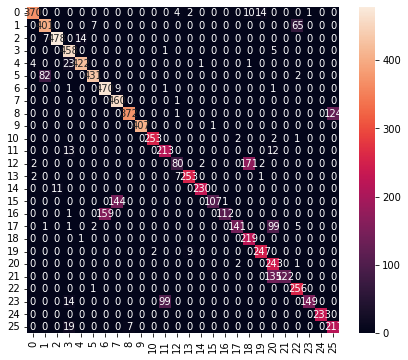

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       401
           1       0.82      0.85      0.83       473
           2       0.98      0.96      0.97       499
           3       0.86      0.99      0.92       464
           4       0.97      0.94      0.95       451
           5       0.98      0.84      0.90       515
           6       0.75      0.98      0.85       482
           7       0.75      1.00      0.86       461
           8       0.98      0.75      0.85       497
           9       1.00      1.00      1.00       408
          10       0.99      0.98      0.99       258
          11       0.68      0.89      0.77       238
          12       0.86      0.31      0.46       257
          13       0.96      0.96      0.96       263
          14       0.99      0.95      0.97       241
          15       0.99      0.42      0.59       252
          16       0.99      0.41      0.58       272
     

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ACER\AppData\Local\Temp\tmp6d63ezos\assets


INFO:tensorflow:Assets written to: C:\Users\ACER\AppData\Local\Temp\tmp6d63ezos\assets


7392

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4624211e-06 2.5575617e-01 1.3625730e-03 3.4193651e-04 5.2143000e-03
 7.6997183e-02 1.4419191e-05 1.7421682e-05 4.0837303e-06 1.8020361e-05
 2.1795936e-06 1.7321120e-09 3.7421921e-04 9.3951567e-06 3.8384693e-04
 2.4050737e-06 1.7677352e-04 7.9388265e-03 2.5900675e-04 8.0663802e-11
 2.5024582e-04 4.4917356e-06 6.5085709e-01 1.1915093e-05 5.3343139e-09
 2.1995245e-08]
22
